In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
image_path = '/Users/PChomeIM/uploads/handwrite.png'
filename_queue = tf.train.string_input_producer([image_path])

reader = tf.WholeFileReader()
key, value = reader.read(filename_queue)

#TensorFlow pricessing image
#https://www.tensorflow.org/versions/r0.12/api_docs/python/image/
# channels=1: output a grayscale image.
# channels=3: output an RGB image.
myimg = tf.image.decode_png(value, channels=1)
#crop_myimg = tf.image.resize_image_with_crop_or_pad(myimg, 300, 300) #置中裁減
#resize_myimg = tf.image.resize_images(crop_myimg, [28, 28]) #調整大小

(278, 297)


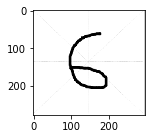

In [3]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    for i in range(1):
        '''
        The difference is in Operations and Tensors. 
        Operations use run() and Tensors use eval().
        In this example, resize_myimg is a tensor.
        And tensor.eval() is equivalent to sess.run(tensor).
        ''' 
        #image = resize_myimg.eval() #is equivalent to sess.run(resize_myimg)
        image = sess.run(myimg)
        reshape_image = image.reshape(image.shape[0], image.shape[1])
        abs_image = abs(256-reshape_image)
        print(abs_image.shape)
        #print(abs_image)
        plt.imshow(abs_image, cmap='binary')
        
    plt.show()

    coord.request_stop()
    coord.join(threads)